# MSDS 430 Milestone 1

#### Complete the following step by step instructions and submit your notebook and data file to Canvas. Your completed notebook should include all output, i.e. run each cell and save your file before submitting.

<font color=green> In this first milestone we will begin working toward the final project for this course. You should begin by finding a data set that contains data you find interesting. You can find some inspiration and data sets on Kaggle.com or through the university library. Keep in mind that you cannot duplicate what's been done on Kaggle (or anywhere else) for your own project, but you can choose your data set from there or at least get ideas. You will need to also import numpy, matplotlib, and pandas at the very least for this assignment. Feel free to import any other libraries you find necessary.  </font>

Step 1 (5 pts.): Explain your plans for the final project.

I plan to analyze the behavior of California Wildfires between 1992 and 2015.

1. The data is a sqlite file so there's some cleaning up there.
2. Then there is some exploratory analysis using pandas, numpy, seaborn, and matplotlib. 
3. Next, there is analysis using Time Series.
4. Finally, the conclusions

## California Wildfires
Source: https://www.kaggle.com/rtatman/188-million-us-wildfires/download#FPA_FOD_20170508.sqlite

Dates: 1992 - 2015

Step 2 (5 pts.): Read in your data file and use pandas to inspect the first 5 lines and the last 5 lines.

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import pandas_profiling
import stats
conn = sqlite3.connect("../data/FPA_FOD_20170508.sqlite")
cur = conn.cursor()

## Getting to understand the data
While Kaggle's documentation goes into detail about what's inside the SQLite file, I like to see for myself what tables are inside the instance I have in my memory, just to confirm they match. They do.

In [2]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
output = cur.fetchall()
tables = [table[0] for table in output]
tables.sort() # sorting alphabetically for readability
print(tables)

['ElementaryGeometries', 'Fires', 'KNN', 'NWCG_UnitIDActive_20170109', 'SpatialIndex', 'geometry_columns', 'geometry_columns_auth', 'geometry_columns_field_infos', 'geometry_columns_statistics', 'geometry_columns_time', 'idx_Fires_Shape', 'idx_Fires_Shape_node', 'idx_Fires_Shape_parent', 'idx_Fires_Shape_rowid', 'spatial_ref_sys', 'spatial_ref_sys_aux', 'spatialite_history', 'sql_statements_log', 'sqlite_sequence', 'views_geometry_columns', 'views_geometry_columns_auth', 'views_geometry_columns_field_infos', 'views_geometry_columns_statistics', 'virts_geometry_columns', 'virts_geometry_columns_auth', 'virts_geometry_columns_field_infos', 'virts_geometry_columns_statistics']


## Getting column information

In [3]:
query = cur.execute("SELECT * FROM fires;") # this will point cur.description to the table fires
names = [description[0] for description in cur.description]
num_cols_fires = len(names) # this I will not sort because the order should coordinate with data
print(names, "\n\n--> column count sqlite file : ", num_cols_fires)

['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'Shape'] 

--> column count sqlite file :  39


## SQLite Rowcount
Before converting into pandas Dataframe, want to know the number of rows in SQLite file to assert conversion was successful.

In [4]:
cur.execute("SELECT COUNT(*) FROM fires;")
num_rows_fires = cur.fetchone()[0]
print("row count sqlite file : ", num_rows_fires)

row count sqlite file :  1880465


In [5]:
sqlite_dim = (num_rows_fires, num_cols_fires) # storing sqlite dimension information for convenience

## Creating the dataframe from SQLite file
According to Kaggle's documentation, FOD_ID is the global unique identifier. This will become the pandas index column.

In [6]:
df = pandas.read_sql("SELECT * FROM fires;", conn, index_col="FOD_ID")

# First 5 elements

In [7]:
df.head(5) # first 5 elements

,OBJECTID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
FOD_ID,,,,,,,,,,,,,,,,,,,,,
1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


# Last 5 elements

In [8]:
df.tail(5) # last 5 elements

,OBJECTID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
FOD_ID,,,,,,,,,,,,,,,,,,,,,
300348363,1880461,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,591814,...,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
300348373,1880462,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,569419,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
300348375,1880463,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,574245,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
300348377,1880464,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,570462,...,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...
300348399,1880465,2015CAIRS26733926,NONFED,ST-CACDF,ST/C&L,USCABDU,San Bernardino Unit,CABDU,CDF - San Bernardino Unit,535436,...,A,34.263217,-116.830950,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x1c\xa7\xe8H.5]\xc0...


Step 3 (5 pts.): Use numpy to perform a few calculations relevant to your goals for the final project. Explain each calculation by including comments within your code.

## Relevant Calculations
1. Extracting California information from US-wide Dataset
2. Basic descriptive statistics
3. Fire frequency by year

In [9]:
# Extracting CA info

CA = df[df['STATE']=='CA'] 
CA.head()

,OBJECTID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
FOD_ID,,,,,,,,,,,,,,,,,,,,,
1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [10]:
# descriptive statistics

CA.describe()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE
count,1.895500e+05,189550.000000,1.895500e+05,189550.000000,189550.000000,9.190800e+04,91908.000000,189550.000000,189550.000000,189550.000000,189550.000000
mean,9.353992e+05,2003.118275,2.452884e+06,201.594571,5.690725,2.453347e+06,203.607727,67.242725,37.434167,-120.182292,10.767038
std,5.864817e+05,7.007634,2.554377e+03,65.936299,3.677568,2.563014e+03,65.127623,2029.960435,2.591567,2.155615,4.402412
min,1.000000e+00,1992.000000,2.448622e+06,1.000000,1.000000,2.448622e+06,1.000000,0.001000,32.537406,-124.402883,0.000000
25%,3.112172e+05,1997.000000,2.450624e+06,164.000000,2.000000,2.451362e+06,169.000000,0.100000,35.177688,-121.721944,6.000000
50%,1.096222e+06,2003.000000,2.452860e+06,202.000000,5.000000,2.453248e+06,206.000000,0.250000,37.565062,-120.530316,14.000000
75%,1.143609e+06,2009.000000,2.455034e+06,245.000000,9.000000,2.455763e+06,246.000000,1.000000,39.475208,-118.595503,14.000000
max,1.880465e+06,2015.000000,2.457388e+06,366.000000,13.000000,2.457388e+06,366.000000,315578.800000,42.051667,-114.125800,15.000000


In [11]:
# missings

CA.isnull().sum()

OBJECTID                           0
FPA_ID                             0
SOURCE_SYSTEM_TYPE                 0
SOURCE_SYSTEM                      0
NWCG_REPORTING_AGENCY              0
NWCG_REPORTING_UNIT_ID             0
NWCG_REPORTING_UNIT_NAME           0
SOURCE_REPORTING_UNIT              0
SOURCE_REPORTING_UNIT_NAME         0
LOCAL_FIRE_REPORT_ID          127617
LOCAL_INCIDENT_ID              61567
FIRE_CODE                     134017
FIRE_NAME                      14993
ICS_209_INCIDENT_NUMBER       186712
ICS_209_NAME                  186712
MTBS_ID                       188413
MTBS_FIRE_NAME                188413
COMPLEX_NAME                  188623
FIRE_YEAR                          0
DISCOVERY_DATE                     0
DISCOVERY_DOY                      0
DISCOVERY_TIME                 79333
STAT_CAUSE_CODE                    0
STAT_CAUSE_DESCR                   0
CONT_DATE                      97642
CONT_DOY                       97642
CONT_TIME                      98333
F

In [12]:
# missings as a proportion to population

proportions = 100 * (round(CA.isnull().sum() / len(CA), 4))

print(proportions)

OBJECTID                       0.00
FPA_ID                         0.00
SOURCE_SYSTEM_TYPE             0.00
SOURCE_SYSTEM                  0.00
NWCG_REPORTING_AGENCY          0.00
NWCG_REPORTING_UNIT_ID         0.00
NWCG_REPORTING_UNIT_NAME       0.00
SOURCE_REPORTING_UNIT          0.00
SOURCE_REPORTING_UNIT_NAME     0.00
LOCAL_FIRE_REPORT_ID          67.33
LOCAL_INCIDENT_ID             32.48
FIRE_CODE                     70.70
FIRE_NAME                      7.91
ICS_209_INCIDENT_NUMBER       98.50
ICS_209_NAME                  98.50
MTBS_ID                       99.40
MTBS_FIRE_NAME                99.40
COMPLEX_NAME                  99.51
FIRE_YEAR                      0.00
DISCOVERY_DATE                 0.00
DISCOVERY_DOY                  0.00
DISCOVERY_TIME                41.85
STAT_CAUSE_CODE                0.00
STAT_CAUSE_DESCR               0.00
CONT_DATE                     51.51
CONT_DOY                      51.51
CONT_TIME                     51.88
FIRE_SIZE                   

In [13]:
# dropping useless columns

CA.drop(columns = ["ICS_209_INCIDENT_NUMBER", "ICS_209_NAME", 
                   "MTBS_ID", "MTBS_FIRE_NAME", "COMPLEX_NAME",
                  "COUNTY", "FIPS_CODE", "FIPS_NAME", "LOCAL_FIRE_REPORT_ID",
                  "OWNER_CODE", "FIRE_CODE"], inplace = True)



/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
"ICS_209_INCIDENT_NUMBER" in CA.columns # checking the drop worked correctly

False

Step 4 (5 pts.): Use matplotlib to create a visual display relevant to your goals for the final project. Explain your graph by including comments within your code.

## Using matplotlib to visualize California wildfire frequencies over time

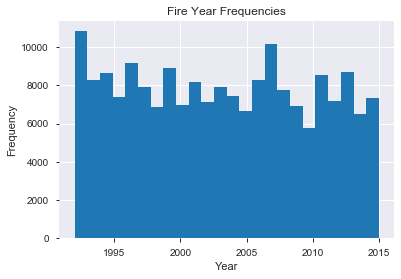

In [15]:
# This gives a frequency distribution of all the years

years = CA["FIRE_YEAR"]
plt.hist(years, bins=len(CA["FIRE_YEAR"].unique()))
plt.title("Fire Year Frequencies")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

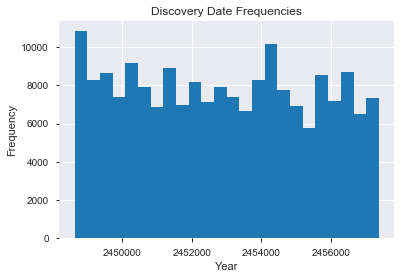

In [16]:
# curious about discovery date, how or if it differs

plt.hist(CA["DISCOVERY_DATE"], bins=len(CA["FIRE_YEAR"].unique()))
plt.title("Discovery Date Frequencies")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

In [17]:
# seeing whether the dates are the datetype

CA.dtypes

OBJECTID                        int64
FPA_ID                         object
SOURCE_SYSTEM_TYPE             object
SOURCE_SYSTEM                  object
NWCG_REPORTING_AGENCY          object
NWCG_REPORTING_UNIT_ID         object
NWCG_REPORTING_UNIT_NAME       object
SOURCE_REPORTING_UNIT          object
SOURCE_REPORTING_UNIT_NAME     object
LOCAL_INCIDENT_ID              object
FIRE_NAME                      object
FIRE_YEAR                       int64
DISCOVERY_DATE                float64
DISCOVERY_DOY                   int64
DISCOVERY_TIME                 object
STAT_CAUSE_CODE               float64
STAT_CAUSE_DESCR               object
CONT_DATE                     float64
CONT_DOY                      float64
CONT_TIME                      object
FIRE_SIZE                     float64
FIRE_SIZE_CLASS                object
LATITUDE                      float64
LONGITUDE                     float64
OWNER_DESCR                    object
STATE                          object
Shape       

In [18]:
# reviewing the missings after dropping useless columns

updated_proportions = 100 * (round(CA.isnull().sum() / len(CA), 4))

print(updated_proportions)

OBJECTID                       0.00
FPA_ID                         0.00
SOURCE_SYSTEM_TYPE             0.00
SOURCE_SYSTEM                  0.00
NWCG_REPORTING_AGENCY          0.00
NWCG_REPORTING_UNIT_ID         0.00
NWCG_REPORTING_UNIT_NAME       0.00
SOURCE_REPORTING_UNIT          0.00
SOURCE_REPORTING_UNIT_NAME     0.00
LOCAL_INCIDENT_ID             32.48
FIRE_NAME                      7.91
FIRE_YEAR                      0.00
DISCOVERY_DATE                 0.00
DISCOVERY_DOY                  0.00
DISCOVERY_TIME                41.85
STAT_CAUSE_CODE                0.00
STAT_CAUSE_DESCR               0.00
CONT_DATE                     51.51
CONT_DOY                      51.51
CONT_TIME                     51.88
FIRE_SIZE                      0.00
FIRE_SIZE_CLASS                0.00
LATITUDE                       0.00
LONGITUDE                      0.00
OWNER_DESCR                    0.00
STATE                          0.00
Shape                          0.00
dtype: float64


In [19]:
# dropping missings for now; will find another strategy since this is removing about half the data

CA_without_missings = CA.dropna()

In [20]:
# all proportions should now have 0% of their data containing missings

should_be_0 = 100 * (round(CA_without_missings.isnull().sum() / len(CA_without_missings), 4))

print(should_be_0)

OBJECTID                      0.0
FPA_ID                        0.0
SOURCE_SYSTEM_TYPE            0.0
SOURCE_SYSTEM                 0.0
NWCG_REPORTING_AGENCY         0.0
NWCG_REPORTING_UNIT_ID        0.0
NWCG_REPORTING_UNIT_NAME      0.0
SOURCE_REPORTING_UNIT         0.0
SOURCE_REPORTING_UNIT_NAME    0.0
LOCAL_INCIDENT_ID             0.0
FIRE_NAME                     0.0
FIRE_YEAR                     0.0
DISCOVERY_DATE                0.0
DISCOVERY_DOY                 0.0
DISCOVERY_TIME                0.0
STAT_CAUSE_CODE               0.0
STAT_CAUSE_DESCR              0.0
CONT_DATE                     0.0
CONT_DOY                      0.0
CONT_TIME                     0.0
FIRE_SIZE                     0.0
FIRE_SIZE_CLASS               0.0
LATITUDE                      0.0
LONGITUDE                     0.0
OWNER_DESCR                   0.0
STATE                         0.0
Shape                         0.0
dtype: float64


In [21]:
# filtering for only numeric datatypes in prep for Pearson coefficiant

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df = CA_without_missings.select_dtypes(include=numerics)

In [ ]:
# Seaborn for practical scatter plots including the Pearson coefficient. 

mean = np.zeros(3)
cov = np.random.uniform(.2, .4, (3, 3))
cov += cov.T
cov[np.diag_indices(3)] = 1
data = np.random.multivariate_normal(mean, cov, 100)

def corrfunc(x, y, **kws):
    r = stats.corr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(df, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)

In [ ]:
CA_without_missings.columns